**Descripción de las tareas**  
**Actividad 1**

Retomando la Actividad 2 de la semana 1 cuyo enunciado indicaba:
“Los datos que se muestran a continuación representan el número de llamadas a un
Callcenter (en
intervalos de 2 minuto medidos 50 veces):  
 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5

Usando una distribución previa
Gamma(2, 1), obtener la distribución posterior bajo un modelo de
Poisson(𝜃𝜃) para los datos.”  

a) Obtén los estimadores bayesianos que minimizan las funciones de riesgo: 𝑙𝑙1, 𝑙𝑙2 𝑦𝑦 𝑙𝑙3.  
b) Calcular un intervalo bayesiano de credibilidad con probabilidad del 95% einterpreta
su resultado

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson, beta
import sympy as sp


In [3]:
# Datos: número de llamadas en cada intervalo de 2 minutos (50 observaciones)
datos = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5])

n = len(datos)            # Número de llamadas en intervalos de 2 minutos
suma = np.sum(datos)       # Suma de llamadas

# Distribución previa Gamma(α, β)
dis_pre_form = 2 # Parametro de forma
dis_pre_tas = 1  # Parametro de tasa



# Actualización de los parámetros de la distribución posterior
dis_post_form = dis_pre_form + suma
dis_post_tasa  = dis_pre_tas + n



print(f"Distribución muestral:({n}, {suma})")
print(f"Distribución previa:({dis_pre_form}, {dis_pre_tas})")
print(f"Distribución posterior:({dis_post_form}, {dis_post_tasa})")

Distribución muestral:(50, 103)
Distribución previa:(2, 1)
Distribución posterior:(105, 51)


In [4]:
# a) Obtén los estimadores bayesianos que minimizan las funciones de riesgo: 𝑙𝑙1, 𝑙𝑙2 𝑦𝑦 𝑙𝑙3.
# Pérdida cuadrática (media)
estimador_media = dis_post_form / dis_post_tasa

# Pérdida 0-1 (moda)
estimador_moda = (dis_post_form - 1) / dis_post_tasa

# Pérdida absoluta (mediana)
estimador_mediana = gamma.ppf(0.5, a=dis_post_form, scale=1/dis_post_tasa)

print("Pérdida cuadrática - media:{:.4f}".format(estimador_media))
print("Pérdida absoluta - mediana:{:.4f}".format(estimador_mediana))
print("Pérdida 0-1 - moda:{:.4f}".format( estimador_moda))


Pérdida cuadrática - media:2.0588
Pérdida absoluta - mediana:2.0523
Pérdida 0-1 - moda:2.0392


Intervalo de credibilidad 95%: [1.6839, 2.4709]
Con un 95% de credibilidad, se puede interpretar que existe una probabilidad del 95% de que el parámetro θ se encuentre entre 1.6839 y 2.4709.


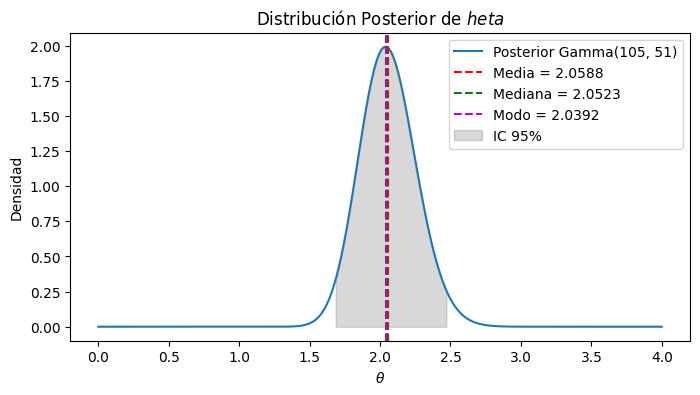

In [5]:
# b) Calcular un intervalo bayesiano de credibilidad con probabilidad del 95% einterpreta su resultado
# Cuantiles 0.025 y 0.975 de la distribución posterior
ci_lower = gamma.ppf(0.025, a=dis_post_form, scale=1/dis_post_tasa)
ci_upper = gamma.ppf(0.975, a=dis_post_form, scale=1/dis_post_tasa)

print("Intervalo de credibilidad 95%: [{:.4f}, {:.4f}]".format(ci_lower, ci_upper))
print(f"Con un 95% de credibilidad, se puede interpretar que existe una probabilidad del 95% de que el parámetro θ se encuentre entre {ci_lower:.4f} y {ci_upper:.4f}.")

# Gráfica de la distribución posterior y del intervalo de credibilidad
theta_values = np.linspace(0, 4, 1000)
posterior_density = gamma.pdf(theta_values, a=dis_post_form, scale=1/dis_post_tasa)

plt.figure(figsize=(8, 4))
plt.plot(theta_values, posterior_density, label=f"Posterior Gamma({dis_post_form}, {dis_post_tasa})")
plt.axvline(estimador_media, color='r', linestyle='--', label=f"Media = {estimador_media:.4f}")
plt.axvline(estimador_mediana, color='g', linestyle='--', label=f"Mediana = {estimador_mediana:.4f}")
plt.axvline(estimador_moda, color='m', linestyle='--', label=f"Modo = {estimador_moda:.4f}")
plt.fill_between(theta_values, posterior_density, where=(theta_values >= ci_lower) & (theta_values <= ci_upper),
                 color='gray', alpha=0.3, label="IC 95%")
plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribución Posterior de $\theta$')
plt.show()

**Actividad 2**  
Un centro de investigación trabaja en el desarrollo un nuevo método para poder diagnosticar enfermedades infecciosas de manera más eficaz. El método que se venía usando proporcionaba un error del 17%, es decir, no detectaba la infección en el 17% de los pacientes que la padecían.
Se escoge una muestra aleatoria de 100 pacientes con el objetivo de comparar los dos métodos.
De los 100 pacientes de la muestra, el nuevo método ha fallado en 12 casos.  

El objetivo del analista es poder disminuir la incertidumbre en la tasa de fallos del nuevo método (𝜃𝜃),
y basándose en todo su conocimiento acumulado, determina que la tasa sigue una distribución previa 𝐵eta(1,6).  

a) Calcular 1 estimador bayesiano asociado a la función de riesgo que consideres más apropiada y explica porque la has escogido.  
b) Calcular un intervalo bayesiano de credibilidad con probabilidad del 95% e interpreta su resultado.

In [6]:

n = 100 # Pacientes
y = 12  # Errores



# Distribución previa Beta
dis_pre_form = 1 # Parametro de forma
dis_pre_tas = 6  # Parametro de tasa



# Actualización de los parámetros de la distribución posterior
dis_post_form = dis_pre_form + y
dis_post_tasa  = dis_pre_tas + n -y



print(f"Distribución muestral:({n}, {y})")
print(f"Distribución previa: Beta({dis_pre_form}, {dis_pre_tas})")
print(f"Distribución posterior: Beta({dis_post_form}, {dis_post_tasa})")

Distribución muestral:(100, 12)
Distribución previa: Beta(1, 6)
Distribución posterior: Beta(13, 94)


**a) Calcular 1 estimador bayesiano asociado a la función de riesgo que consideres más apropiada y explica porque la has escogido.**

Usamos la media posterior porque facilita la comparación directa entre el nuevo método y el método anterior, permitiéndonos validar si efectivamente se reduce la tasa de error."

In [7]:
# Se utiliza la media posterior como estimador bayesiano porque minimiza el error cuadrático.
# La función de pérdida cuadrática penaliza más fuertemente los errores grandes, por lo que la media
# resulta ser la elección óptima en escenarios donde se desea evitar grandes desviaciones.
bayes_estimator = dis_post_form / (dis_post_form + dis_post_tasa)
print("Estimador Bayesiano (media posterior): {:.4f}".format(bayes_estimator))

Estimador Bayesiano (media posterior): 0.1215


In [8]:
# b) Calcular un intervalo bayesiano de credibilidad con probabilidad del 95% e interpreta su resultado.

# Cálculo del intervalo de credibilidad del 95%
ci_lower = beta.ppf(0.025, dis_post_form, dis_post_tasa)
ci_upper = beta.ppf(0.975, dis_post_form, dis_post_tasa)
print("Intervalo de credibilidad 95%: [{:.4f}, {:.4f}]".format(ci_lower, ci_upper))
print(f"Con un 95% de credibilidad, se puede interpretar que existe una probabilidad del 95% de que el parámetro θ se encuentre entre {ci_lower:.4f} y {ci_upper:.4f}.")

Intervalo de credibilidad 95%: [0.0669, 0.1894]
Con un 95% de credibilidad, se puede interpretar que existe una probabilidad del 95% de que el parámetro θ se encuentre entre 0.0669 y 0.1894.


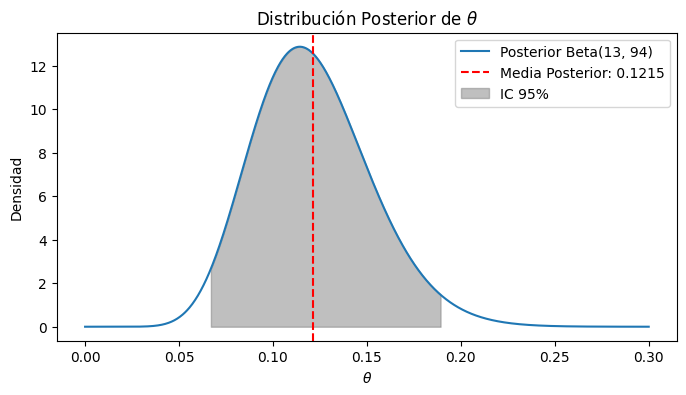

In [9]:
# Gráfico de la distribución posterior y el intervalo de credibilidad
theta_values = np.linspace(0, 0.3, 1000)
posterior_pdf = beta.pdf(theta_values, dis_post_form, dis_post_tasa)

plt.figure(figsize=(8, 4))
plt.plot(theta_values, posterior_pdf, label="Posterior Beta({}, {})".format(dis_post_form, dis_post_tasa))
plt.axvline(bayes_estimator, color='red', linestyle='--',
            label="Media Posterior: {:.4f}".format(bayes_estimator))
plt.fill_between(theta_values, posterior_pdf,
                 where=(theta_values >= ci_lower) & (theta_values <= ci_upper),
                 color='gray', alpha=0.5, label="IC 95%")
plt.xlabel(r'$\theta$')
plt.ylabel('Densidad')
plt.legend()
plt.title("Distribución Posterior de $\\theta$")
plt.show()

**Actividad 3**  
Una empresa aseguradora con 15.000 clientes quiere estimar la tasa de reclamaciones falsas anuales.
Se contrata a un experto para llevar a cabo un estudio, quien considerando toda la información
disponible decide modelizar la tasa de reclamaciones falsas siguiendo una
Beta(a, b) de **hiperparámetros a y b desconocidos.**  
Se seleccionan 50 reclamaciones aleatoriamente y no se observa ninguna reclamación falsa.
Consideramos una media de 0,05 y una moda de 0,03.  
a) ¿Cuál es el valor de los hiperparámetros a y b?  
b) Calcula 2 estimadores puntuales bayesianos del parámetro 𝜃𝜃.  
c) Calcular un intervalo bayesiano de credibilidad con probabilidad 95% e interpreta su resultado.

In [10]:
# a) ¿Cuál es el valor de los hiperparámetros a y b?


n = 50     # Total de reclamaciones en la muestra
x = 0      # Número de reclamaciones falsas observadas
# Distribución muestral:(50, 0)

media = 0.05
moda = 0.03

# Definir la variable simbólica para M (a + b)
M = sp.symbols('M', positive=True)


# Relación de la media: a/(a+b) = media  =>  a = media * M.
# Relación de la moda: (a - 1)/(M - 2) = moda, con a = media*M.
# Esto da la ecuación: media*M - 1 = moda*(M - 2)
equation = sp.Eq(media * M - 1, moda * (M - 2))

# Resolver la ecuación para M
solution_M = sp.solve(equation, M)
M_value = solution_M[0]

# Calcular a y b
a_value = media * M_value
b_value = M_value - a_value

print("M (a + b) ={:.4f}".format(M_value))
print("Hiperparámetro a ={:.4f}".format(a_value))
print("Hiperparámetro b ={:.4f}".format( b_value))


M (a + b) =47.0000
Hiperparámetro a =2.3500
Hiperparámetro b =44.6500


In [11]:
#b) Calcula 2 estimadores puntuales bayesianos del parámetro 𝜃𝜃.
# Actualización de la distribución posterior:
a_post = a_value + x         # a_post = 2.35 + 0 = 2.35
b_post = b_value + n - x     # b_post = 44.65 + 50 - 0 = 94.65

print("Posterior: Beta({:.4f}, {:.4f})".format(a_post, b_post))



# Utilizamos la media posterior es óptimo bajo pérdida cuadrática porque minimiza el error esperado.
theta_mean = a_post / (a_post + b_post)

# La moda se elige bajo pérdida 0-1 ya que maximiza la probabilidad de acierto al representar el valor más probable de θ.
theta_mode = (a_post - 1) / (a_post + b_post - 2)


print("Estimador Bayesiano (Media Posterior): {:.4f}".format(theta_mean))
print("Estimador Bayesiano (Moda Posterior): {:.4f}".format(theta_mode))

Posterior: Beta(2.3500, 94.6500)
Estimador Bayesiano (Media Posterior): 0.0242
Estimador Bayesiano (Moda Posterior): 0.0142


In [12]:
# c) Calcular un intervalo bayesiano de credibilidad con probabilidad 95% e interpreta su resultado.
a_post = float(a_post)
b_post = float(b_post)

# Cálculo de los cuantiles 2.5% y 97.5% de la distribución posterior
ci_lower = beta.ppf(0.025, a_post, b_post)
ci_upper = beta.ppf(0.975, a_post, b_post)

print("Intervalo de credibilidad 95%: [{:.4f}, {:.4f}]".format(ci_lower, ci_upper))

print(f"Existe un 95% de probabilidad de que el valor real de θ se encuentre entre el límite inferior ({ci_lower:.4f}) y el límite superior ({ci_upper:.4f})")


Intervalo de credibilidad 95%: [0.0038, 0.0627]
Existe un 95% de probabilidad de que el valor real de θ se encuentre entre el límite inferior (0.0038) y el límite superior (0.0627)


**Actividad 4**  
Una determinada marca asegura que el 95% de sus coches no necesitarán reparación durante los 3 años de garantía. Esta creencia se puede modelizar mediante una Beta(a,b) con hiperparámetros a=4,75 y b=0,25.  
El comercial es muy persuasivo de modo que acabamos comprando 20 vehículos de dicha marca para nuestra empresa, de los cuales 12 de ellos requieren reparación durante el periodo de garantía indicado.  
a) Calcula los 3 estimadores puntuales bayesianos que hemos estudiado en clase.  
b) Realiza una estimación por intervalos con probabilidad 95%

In [13]:
# a) Calcula los 3 estimadores puntuales bayesianos que hemos estudiado en clase.

n = 20                     # Vehículos comprados
x = 20 - 12                # Vehículos que NO requieren reparación (éxitos)
# x = 8

# Prior: Probabilidad de que un coche no requiera reparación
a_prior = 4.75
b_prior = 0.25

# Distribución posterior (conjugación para la Binomial con prior Beta)
a_post = a_prior + x       # 4.75 + 8 = 12.75
b_post = b_prior + (n - x)   # 0.25 + 12 = 12.25

print("Distribución posterior: Beta({:.2f}, {:.2f})".format(a_post, b_post))

# a) Calcula los 3 estimadores puntuales bayesianos que hemos estudiado en clase.

# 1. Media posterior (óptima bajo pérdida cuadrática)
theta_mean = a_post / (a_post + b_post)

# 2. Moda posterior (óptima bajo pérdida 0-1), válida si a_post > 1 y b_post > 1
theta_mode = (a_post - 1) / (a_post + b_post - 2)

# 3. Mediana posterior (óptima bajo pérdida absoluta), se calcula numéricamente
theta_median = beta.ppf(0.5, a_post, b_post)

print("Estimador Bayesiano (Media): {:.4f}".format(theta_mean))
print("Estimador Bayesiano (Moda): {:.4f}".format(theta_mode))
print("Estimador Bayesiano (Mediana): {:.4f}".format(theta_median))




Distribución posterior: Beta(12.75, 12.25)
Estimador Bayesiano (Media): 0.5100
Estimador Bayesiano (Moda): 0.5109
Estimador Bayesiano (Mediana): 0.5103


Intervalo de credibilidad 95%: [0.3188, 0.6996]
Existe un 95% de probabilidad de que el valor real de θ se encuentre entre 0.3188 y 0.6996.


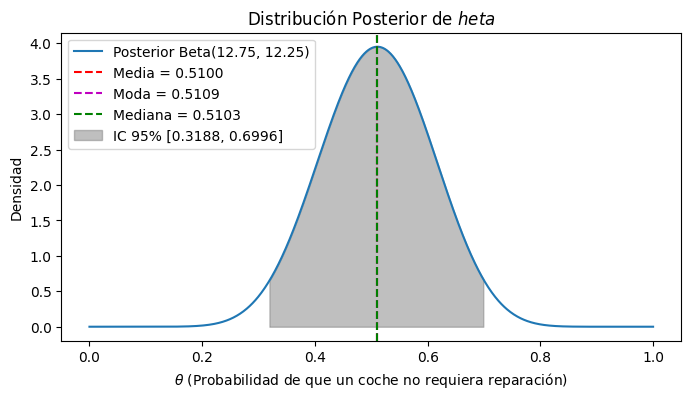

In [14]:

# b) Realiza una estimación por intervalos con probabilidad 95%

ci_lower = beta.ppf(0.025, a_post, b_post)
ci_upper = beta.ppf(0.975, a_post, b_post)

print("Intervalo de credibilidad 95%: [{:.4f}, {:.4f}]".format(ci_lower, ci_upper))
print(f"Existe un 95% de probabilidad de que el valor real de θ se encuentre entre {ci_lower:.4f} y {ci_upper:.4f}.")

# Visualización de la distribución posterior
theta_vals = np.linspace(0, 1, 1000)
posterior_pdf = beta.pdf(theta_vals, a_post, b_post)

plt.figure(figsize=(8, 4))
plt.plot(theta_vals, posterior_pdf, label=f"Posterior Beta({a_post:.2f}, {b_post:.2f})")
plt.axvline(theta_mean, color='r', linestyle='--', label=f"Media = {theta_mean:.4f}")
plt.axvline(theta_mode, color='m', linestyle='--', label=f"Moda = {theta_mode:.4f}")
plt.axvline(theta_median, color='g', linestyle='--', label=f"Mediana = {theta_median:.4f}")
plt.fill_between(theta_vals, posterior_pdf, where=(theta_vals >= ci_lower) & (theta_vals <= ci_upper),
                 color='gray', alpha=0.5, label=f"IC 95% [{ci_lower:.4f}, {ci_upper:.4f}]")
plt.xlabel(r'$\theta$ (Probabilidad de que un coche no requiera reparación)')
plt.ylabel('Densidad')
plt.title("Distribución Posterior de $\theta$")
plt.legend()
plt.show()

**Actividad 5**  
Pregunta teórica:  
Explica de la manera más breve posible la principal diferencia entre:
- Estimación puntual frecuentista y estimación puntual bayesiana.
- Intervalo de confianza frecuentista y un intervalo de credibilidad bayesiano.

**Estimación puntual frecuentista vs. bayesiana:**

La estimación frecuentista es un valor fijo obtenido de los datos observados)muestra).
La estimación bayesiana es un valor de la distribución posterior, que se obtiene con la distribución muestral(datos objetivos) y previa(datos subjetivos).

**Intervalo de confianza frecuentista vs. intervalo de credibilidad bayesiano:**

El intervalo de confianza frecuentista es un rango quese obtiene al repetir un experimento en condiciones controladas en un porcentaje ficjo(p.ej. 95%).  
El intervalo de credibilidad bayesiano es un rango que indica la probabilidad (p.ej. 95%)de que el parámetro se encuentre dentro del intervalo, utilizando la distribución muestral(datos objetivos) y previa(datos subjetivos)

**EJEMPLO**  
Para aclarar estas diferencias realizaremos un ejemplo práctico utilizando los mismos datos, calculando la proporción de personas con colesterol alto en Gran Canaria mediante ambos enfoques (frecuentista y bayesiano).

In [ ]:
!pip install pymc arviz
import pandas as pd
import numpy as np
from scipy.stats import beta, binom
import pymc as pm
import arviz as az


In [16]:
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv("/content/c00035a_0453.csv")

# Estimación puntual e intervalo de confianza frecuentista
# Filtrar datos para la región seleccionada
region = 'Gran Canaria - Área Metropolitana'

region_data = datos[
    (datos['comarcas_islas_nombre'] == region) &
    (datos['indicadores_nombre'] == 'Absoluto')
]

# Obtener número de personas con colesterol alto ('Sí') y total
colesterol_alto = region_data[region_data['medicion_nivel_colesterol_nombre'] == 'Sí']['poblacion_menor_16_anios'].values[0]
total_poblacion = region_data[region_data['medicion_nivel_colesterol_nombre'] == 'Total']['poblacion_menor_16_anios'].values[0]

print(f"Colesterol alto: {colesterol_alto}")
print(f"Total población: {total_poblacion}")



Mounted at /content/drive
Colesterol alto: 43881.0
Total población: 87251.0


In [17]:


from statsmodels.stats.proportion import proportion_confint

# Estimación puntual
proporcion_frec = colesterol_alto / total_poblacion

# Intervalo de confianza del 95%
ic_low, ic_high = proportion_confint(count=colesterol_alto, nobs=total_poblacion, alpha=0.05, method='wilson')

print(f"Proporción frecuentista estimada: {proporcion_frec:.4f}")
print(f"Intervalo de confianza 95%: [{ic_low:.4f}, {ic_high:.4f}]")


Proporción frecuentista estimada: 0.5029
Intervalo de confianza 95%: [0.4996, 0.5062]


In [18]:
# Estimación puntual e intervalo de credibilidad bayesiano

# Modelo Bayesiano con PyMC
with pm.Model() as modelo_bayesiano:
    # Distribución previa Beta(1,1)
    p = pm.Beta('p', alpha=1, beta=1)

    # Modelo de verosimilitud Binomial
    observacion = pm.Binomial('observacion', n=total_poblacion, p=p, observed=colesterol_alto)

    # Muestreo posterior
    posterior = pm.sample(2000, return_inferencedata=True, cores=2)

# Resumen de resultados Bayesianos
az.summary(posterior, hdi_prob=0.95)



Output()

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.503,0.002,0.5,0.506,0.0,0.0,1817.0,2823.0,1.0


In [19]:
# Intervalo de credibilidad (95%) y estimación puntual (media posterior)
estimacion_bayes = posterior.posterior['p'].mean().values
hdi_bayes = az.hdi(posterior, hdi_prob=0.95)['p'].values

print(f"Proporción bayesiana estimada: {estimacion_bayes:.4f}")
print(f"Intervalo de credibilidad 95%: [{hdi_bayes[0]:.4f}, {hdi_bayes[1]:.4f}]")


Proporción bayesiana estimada: 0.5030
Intervalo de credibilidad 95%: [0.4997, 0.5063]
